In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [5]:
pip install -U imbalanced-learn scikit-learn


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)


In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
df['max_glu_serum'] = df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0])
df['A1Cresult'] = df['A1Cresult'].fillna(df['A1Cresult'].mode()[0])

<Axes: xlabel='readmitted', ylabel='num_medications'>

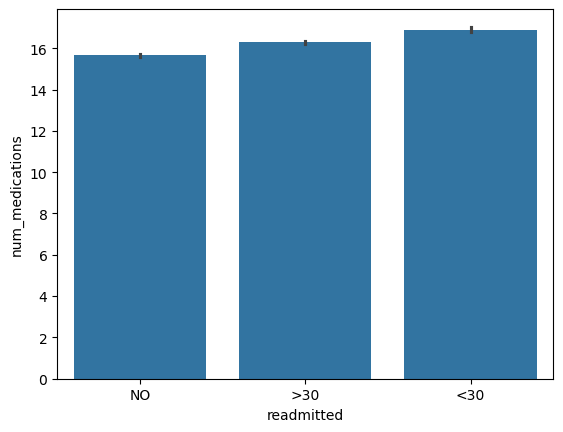

In [11]:
sns.barplot(x='readmitted', y='num_medications', data=df)

<Axes: xlabel='readmitted', ylabel='count'>

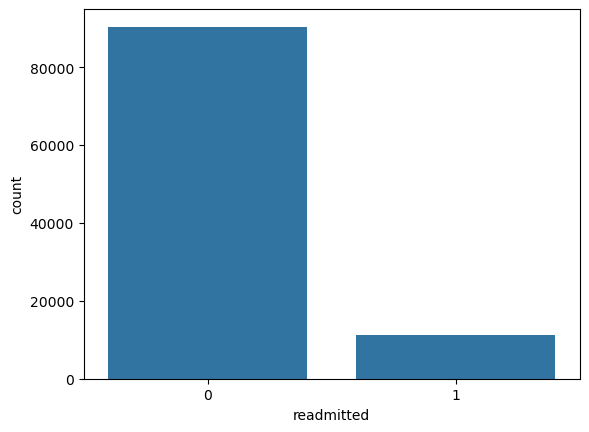

In [12]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

sns.countplot(x='readmitted', data=df)

In [13]:
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [14]:
X = df.drop(columns=['readmitted'])
y = df['readmitted']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)


In [19]:
from sklearn.preprocessing import LabelEncoder


X_train_encoded = X_train.copy()


for col in X_train_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)


In [23]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("after SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 72326, 1: 9086})
after SMOTE: Counter({0: 72326, 1: 72326})


In [ ]:
pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.4 MB 3.3 MB/s eta 0:00:31
    --------------------------------------- 2.1/102.4 MB 3.8 MB/s eta 0:00:27
   - -------------------------------------- 2.9/102.4 MB 3.7 MB/s eta 0:00:27
   - -------------------------------------- 3.7/102.4 MB 3.8 MB/s eta 0:00:27
   - -------------------------------------- 4.5/102.4 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 5.2/102.4 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 6.0/102.4 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 6.8/102.4 MB 3.9 MB/s eta 0:00:25
   --- ------------------------------------ 7.9/102.4 MB 3.9 MB/s eta 0:00:25
   --- ------------------------------------ 8.7/102.4 MB 3.8 MB/s eta 0:00:25
   ---

In [25]:
from catboost import CatBoostClassifier

In [26]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()



In [27]:
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
cat_model.fit(X_train_smote, y_train_smote , cat_features=cat_features)


0:	learn: 0.6306852	total: 464ms	remaining: 7m 43s
100:	learn: 0.2696157	total: 41.7s	remaining: 6m 10s
200:	learn: 0.2465680	total: 1m 19s	remaining: 5m 17s
300:	learn: 0.2355265	total: 1m 59s	remaining: 4m 36s
400:	learn: 0.2278002	total: 2m 38s	remaining: 3m 57s
500:	learn: 0.2212188	total: 3m 21s	remaining: 3m 20s
600:	learn: 0.2169888	total: 3m 58s	remaining: 2m 38s
700:	learn: 0.2136473	total: 4m 40s	remaining: 1m 59s
800:	learn: 0.2103853	total: 5m 31s	remaining: 1m 22s
900:	learn: 0.2075531	total: 6m 22s	remaining: 42s
999:	learn: 0.2045374	total: 7m 13s	remaining: 0us


In [28]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8861648815957551

In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.24      0.01      0.02      2271

    accuracy                           0.89     20354
   macro avg       0.57      0.50      0.48     20354
weighted avg       0.82      0.89      0.84     20354



In [31]:
confusion_matrix(y_test, y_pred)

array([[18015,    68],
       [ 2249,    22]], dtype=int64)